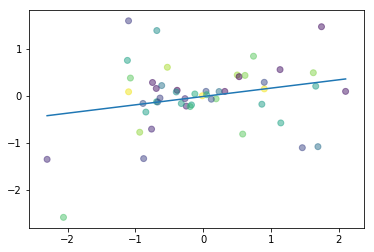

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Creates 50 random x and y numbers
np.random.seed(1)
n = 50
x = np.random.randn(n)
y = x * np.random.randn(n)

# Makes the dots colorful
colors = np.random.rand(n)

# Plots best-fit line via polyfit
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

# Plots the random x and y data points we created
# Interestingly, alpha makes it more aesthetically pleasing
plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()


In [2]:
#Building a Linear Regression Model with PyTorch
#Create a list of values from 0 to 11
x_values = [i for i in range(11)]

In [3]:
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [4]:
#Convert list of numbers to numpy array
# Convert to numpy
x_train = np.array(x_values, dtype=np.float32)
x_train.shape

(11,)

In [5]:
#Convert to 2-dimensional array
# IMPORTANT: 2D required
x_train = x_train.reshape(-1, 1)
x_train.shape

(11, 1)

In [7]:
#Create list of y values

In [8]:
#y=2x+1 取得x變化的y值
y_values = [2*i + 1 for i in x_values]

In [9]:
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [11]:
y_values = []
for i in x_values:
    result = 2*i + 1
    y_values.append(result) 
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [13]:
#Convert to numpy array
#確保原始數據是numpy形式，以方便作後續計算
y_train = np.array(y_values, dtype=np.float32)
y_train.shape

(11,)

In [14]:
#Reshape y numpy array to 2-dimension
# IMPORTANT: 2D required
y_train = y_train.reshape(-1, 1)
y_train.shape

(11, 1)

# Building Model

In [15]:
import torch
import torch.nn as nn

In [16]:
# Create class
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)  

    def forward(self, x):
        out = self.linear(x)
        return out

In [17]:
#input: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
#期望輸出 output: [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

In [18]:
#定義損失函數
criterion = nn.MSELoss()

In [21]:
#定義學習速率、優化器
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [22]:
epochs = 100

In [23]:
for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch Variable
    inputs = torch.from_numpy(x_train).requires_grad_()
    labels = torch.from_numpy(y_train)

    # Clear gradients w.r.t. parameters
    optimizer.zero_grad() 

    # Forward to get output
    outputs = model(inputs)

    # Calculate Loss
    loss = criterion(outputs, labels)

    # Getting gradients w.r.t. parameters
    loss.backward()

    # Updating parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 1, loss 156.88211059570312
epoch 2, loss 12.919260025024414
epoch 3, loss 1.1752983331680298
epoch 4, loss 0.21602292358875275
epoch 5, loss 0.13643652200698853
epoch 6, loss 0.12861807644367218
epoch 7, loss 0.12666834890842438
epoch 8, loss 0.1252119243144989
epoch 9, loss 0.12381045520305634
epoch 10, loss 0.1224275603890419
epoch 11, loss 0.12106046080589294
epoch 12, loss 0.11970852315425873
epoch 13, loss 0.11837172508239746
epoch 14, loss 0.11704988777637482
epoch 15, loss 0.11574281007051468
epoch 16, loss 0.11445023119449615
epoch 17, loss 0.11317232251167297
epoch 18, loss 0.1119086891412735
epoch 19, loss 0.1106589138507843
epoch 20, loss 0.10942302644252777
epoch 21, loss 0.10820130258798599
epoch 22, loss 0.10699298977851868
epoch 23, loss 0.1057981625199318
epoch 24, loss 0.10461694002151489
epoch 25, loss 0.10344858467578888
epoch 26, loss 0.10229330509901047
epoch 27, loss 0.1011510118842125
epoch 28, loss 0.100021593272686
epoch 29, loss 0.09890475124120712
epoch

In [24]:
#Looking at training values

In [25]:
# y = 2x + 1 
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

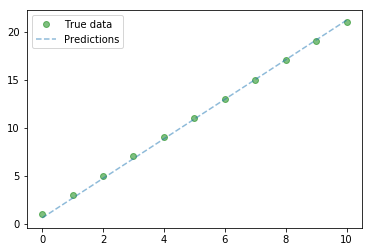

In [27]:
#Plot of predicted and actual values
# Clear figure
plt.clf()

# Get predictions
predicted = model(torch.from_numpy(x_train).requires_grad_()).data.numpy()

# Plot true data
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)

# Plot predictions
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)

# Legend and plot
plt.legend(loc='best')
plt.show()

In [28]:
predicted

array([[ 0.60732263],
       [ 2.6638718 ],
       [ 4.720421  ],
       [ 6.77697   ],
       [ 8.833519  ],
       [10.890068  ],
       [12.946617  ],
       [15.003166  ],
       [17.059715  ],
       [19.116264  ],
       [21.172813  ]], dtype=float32)

In [30]:
save_model = False
if save_model is True:
    # Saves only parameters
    # alpha & beta
    torch.save(model.state_dict(), 'awesome_model.pkl')

In [31]:
load_model = False
if load_model is True:
    model.load_state_dict(torch.load('awesome_model.pkl'))

In [37]:
#CPU
import torch
import torch.nn as nn

'''
STEP 1: CREATE MODEL CLASS
'''
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)  

    def forward(self, x):
        out = self.linear(x)
        return out

'''
STEP 2: INSTANTIATE MODEL CLASS
'''
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

'''
STEP 3: INSTANTIATE LOSS CLASS
'''

criterion = nn.MSELoss()

'''
STEP 4: INSTANTIATE OPTIMIZER CLASS
'''

learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 5: TRAIN THE MODEL
'''
epochs = 100
for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch Variable
    inputs = torch.from_numpy(x_train).requires_grad_()
    labels = torch.from_numpy(y_train)

    # Clear gradients w.r.t. parameters
    optimizer.zero_grad() 

    # Forward to get output
    outputs = model(inputs)

    # Calculate Loss
    loss = criterion(outputs, labels)

    # Getting gradients w.r.t. parameters
    loss.backward()

    # Updating parameters
    optimizer.step()
    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 1, loss 116.66674041748047
epoch 2, loss 10.217367172241211
epoch 3, loss 1.526798129081726
epoch 4, loss 0.8101921081542969
epoch 5, loss 0.7440839409828186
epoch 6, loss 0.7311206459999084
epoch 7, loss 0.7225767374038696
epoch 8, loss 0.7144768238067627
epoch 9, loss 0.7064960598945618
epoch 10, loss 0.6986064314842224
epoch 11, loss 0.6908050775527954
epoch 12, loss 0.6830906271934509
epoch 13, loss 0.6754629015922546
epoch 14, loss 0.667919933795929
epoch 15, loss 0.6604613065719604
epoch 16, loss 0.6530863046646118
epoch 17, loss 0.6457934379577637
epoch 18, loss 0.6385820508003235
epoch 19, loss 0.631450891494751
epoch 20, loss 0.6243997812271118
epoch 21, loss 0.6174269318580627
epoch 22, loss 0.6105322241783142
epoch 23, loss 0.6037148237228394
epoch 24, loss 0.5969732999801636
epoch 25, loss 0.5903070569038391
epoch 26, loss 0.5837148427963257
epoch 27, loss 0.5771967172622681
epoch 28, loss 0.5707514882087708
epoch 29, loss 0.5643779039382935
epoch 30, loss 0.558075726

# Building a Linear Regression Model with PyTorch (GPU)

In [38]:
#記得model、tensors with gradients都是需要放置GPU的地方

import torch
import torch.nn as nn
import numpy as np

'''
STEP 1: CREATE MODEL CLASS
'''
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)  

    def forward(self, x):
        out = self.linear(x)
        return out

'''
STEP 2: INSTANTIATE MODEL CLASS
'''
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)


#######################
#  USE GPU FOR MODEL  #
#######################

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #GPU
model.to(device) #GPU

'''
STEP 3: INSTANTIATE LOSS CLASS
'''

criterion = nn.MSELoss()

'''
STEP 4: INSTANTIATE OPTIMIZER CLASS
'''

learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 5: TRAIN THE MODEL
'''
epochs = 100
for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch Variable

    #######################
    #  USE GPU FOR MODEL  #
    #######################
    inputs = torch.from_numpy(x_train).to(device) #GPU
    labels = torch.from_numpy(y_train).to(device) #GPU

    # Clear gradients w.r.t. parameters
    optimizer.zero_grad() 

    # Forward to get output
    outputs = model(inputs)

    # Calculate Loss
    loss = criterion(outputs, labels)

    # Getting gradients w.r.t. parameters
    loss.backward()

    # Updating parameters
    optimizer.step()

    # Logging
    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 1, loss 63.56597137451172
epoch 2, loss 5.188754081726074
epoch 3, loss 0.4270651936531067
epoch 4, loss 0.03862612694501877
epoch 5, loss 0.006900012027472258
epoch 6, loss 0.004270355682820082
epoch 7, loss 0.004014459438621998
epoch 8, loss 0.003952668514102697
epoch 9, loss 0.00390712870284915
epoch 10, loss 0.0038633947260677814
epoch 11, loss 0.0038202230352908373
epoch 12, loss 0.003777582198381424
epoch 13, loss 0.003735379781574011
epoch 14, loss 0.003693672828376293
epoch 15, loss 0.0036524555180221796
epoch 16, loss 0.0036116542760282755
epoch 17, loss 0.0035713035613298416
epoch 18, loss 0.0035314548294991255
epoch 19, loss 0.0034920054022222757
epoch 20, loss 0.003453006036579609
epoch 21, loss 0.0034144397359341383
epoch 22, loss 0.00337632792070508
epoch 23, loss 0.003338614711537957
epoch 24, loss 0.0033013070933520794
epoch 25, loss 0.0032644770108163357
epoch 26, loss 0.0032280206214636564
epoch 27, loss 0.003191980067640543
epoch 28, loss 0.003156323917210102
e